# <center>Instituto Tecnológico de Estudios Superiores de Occidente</center>



<img style="float: center" src="logo-ITESO-png.png" width="350px" height="125px"/>




#### <center>"Simulación Matemática"</center>


### <center>SIMULACIÓN DE UN PORTAFOLIO DE INVERSIÓN</center>

.



**<center>Profesor: Gabriel Alejando Morales Ruiz</center>**

.



**<center>Leonardo Rodríguez Hernández - 741983</center>**



**<center>Valenzuela Lafarga Mariana - 749770</center>**



**<center>Nancy Woolrich Sorroza - 741983</center>**



.


**<center>22 de abril 2024.</center>**

## <center> Construcción de un portafolio de inversión con programación lineal</center>

### Introducción
    
  
    

### Objetivos

#### 1.1 Objetivo general.

Pronosticar un portaforlio de inversión a un año.

#### 1.2 Objetivos específicos
- Calcular la media y desviación estándar de los rendimientos diarios de las acciones de cada empresa para evaluar su distribución y realizar el pronósico

- Utilizar el método de aproximación de Montecarlo para simular múltiples escenarios de rendimiento del portafolio de inversión en el próximo año.
- Generar visualizaciones claras y concisas de los resultados del proyecto, incluidas gráficas de desempeño del portafolio y distribuciones de rendimientos simulados.


### Modelo del problema.

Para generar el modelo que pronostique los rendimientos a 1 año se utilizarán los datos diarios del 14 de abril de 2022 a 2023 para poder realizar la comparación con el año 2024 y determinar si el modelo planteado es válido, los datos son sacados de Yahoo finance.

Las acciones con las que se trabajará en el portafolio son:

>- **AAPL:** Apple Inc. diseña, fabrica y comercializa teléfonos inteligentes, computadoras personales, tabletas, dispositivos portátiles y accesorios en todo el mundo.Es la empresa de tecnología más grande del mundo.

>- **AZO:** AutoZone, Inc. vende y distribuye repuestos y accesorios automotrices en Estados Unidos, México y Brasil. La empresa ofrece diversos productos para automóviles, vehículos utilitarios deportivos, camionetas y camiones ligeros.


>- **VRTX:** ertex Pharmaceuticals Incorporated, una empresa de biotecnología, se dedica al desarrollo y comercialización de terapias para el tratamiento de la fibrosis quística (FQ).


>- **OXY:** Occidental Petroleum Corporation, junto con sus subsidiarias, se dedica a la adquisición, exploración y desarrollo de propiedades de petróleo y gas en los Estados Unidos, Medio Oriente y el norte de África.


>- **WMT:** Walmart Inc. se dedica a la operación de ventas al por menor, al por mayor, otras unidades y comercio electrónico en todo el mundo. La empresa opera a través de tres segmentos: Walmart U.S., Walmart International y Sam's Club.

Se decidieron escoger acciones que fueran medianamente estables con volatilidades no tan altas para que el modelo tenga un menor grado de error. 


In [16]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline
yf.pdr_override()

ModuleNotFoundError: No module named 'pandas_datareader'

In [9]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers,
                   start_date=None,
                   end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(
        tickers=tickers,
        start=start_date,
        end=end_date
    )
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [10]:
tickers = ["AAPL", "AZO", "VRTX", "OXY", "WMT"]
start_date = "2022-04-14"
end_date= "2023-04-14"
closes = get_adj_closes(
    tickers=tickers,
    start_date=start_date,
    end_date=end_date
)
closes.head()

NameError: name 'web' is not defined

.

- **Modelo**

El siguente paso es obtener el rendimiento diario, para ello se va a observar la distribución de los rendimientos y así comprobar que se asemejen a una distribucion normal.

.

In [11]:
ret = closes.pct_change().dropna()
ret.head()

NameError: name 'closes' is not defined

En la siguiente gráfica podemos ver que las distribuciones de los rendimientos se asemejan a una normal

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AZO'}>],
       [<AxesSubplot:title={'center':'OXY'}>,
        <AxesSubplot:title={'center':'VRTX'}>],
       [<AxesSubplot:title={'center':'WMT'}>, <AxesSubplot:>]],
      dtype=object)

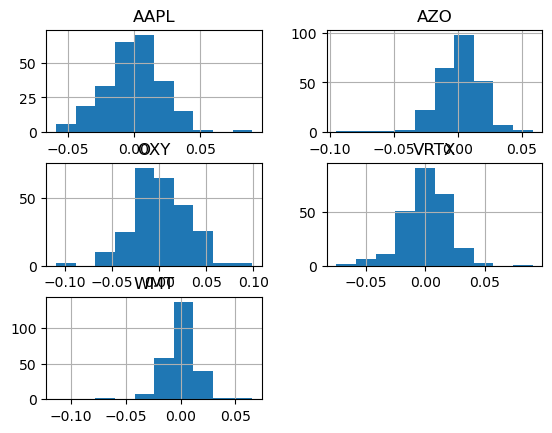

In [5]:
ret.hist()

Ahora se van a obtener los datos de media y desviación estándar para cada uno de estos activos y así tener los parámetros de las distribuciones.

In [6]:
summary_daily = pd.DataFrame({
    "mean": ret.mean(),
    "vol": ret.std()
}).T
summary_daily

,AAPL,AZO,OXY,VRTX,WMT
mean,0.000267,0.000921,0.000799,0.000787,0.000001
vol,0.021805,0.017606,0.028717,0.019963,0.016388


Una vez obtenidos los parámetros de media y desviación de cada uno de los activos se va a realizar la simulación a 1 año con la siguiente función.

In [2]:
def simR(media,std,start,dias,N):
    sim_R= np.random.normal(media,std,size=(dias,N))+1
    fechas= pd.date_range(start,periods=dias)
    return pd.DataFrame(sim_R,index=fechas)

- **Explicación y limitaciones**

El modelo planteado anteriormente pretende obtener el rendimiento pronosticado del portafolio planteado a 1 año, esto se obtiene mediamente las simulaciones de 365 dias según la media y la desviación de cada activo, después se obtiene el precio final y para determinar rendimiento total.

Las limitaciones que presenta este modelo es que los activos pueden no siempre seguir la misma tendencia, y si son activos muy volátiles su media y su desviación estandar cambia drásticamente de un periodo a otro, por lo que puede no ser un modelo tan certero para todo tipo de activos.

### Solución del modelo



In [3]:
#Simulación del rendimiento a 1 año
sim_R=simR(ret.mean(), ret.std(), "2023-05-14", 365, 1000)

NameError: name 'ret' is not defined

In [17]:
ret.iloc[-1]

NameError: name 'ret' is not defined

In [ ]:
# Precios de cierre promedio de las acciones

precios_cierre=sim_R.cumprod()*26.912582 
precios_cierre.mean(axis=1)

In [ ]:
# Probabilidad del precio umbral
# Simulaciones en el que los precios de cierre fueron mayores a 28

(sim_R.cumprod()*26.912582 > 28).mean(axis=1)

In [ ]:
# Probabilidad que el dinero crezca un 20%

(sim_R_.cumprod()*56.632259 > 56.632259*1.20).mean(axis=1)

### Conclusiones.



### Referencias.

